In [1]:
import torchvision
from torchvision.utils import make_grid
from torchvision import datasets, transforms
from src.model import MLModel
from src.trainer import Trainer
from src.dataloader import Loader
from src.utils.utils import plot_history
import matplotlib.pyplot as plt

In [2]:
training_dir='cifar10-dataset'

In [3]:
# Define data augmentation
def _get_transforms():
    transform = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])
    return transform

In [4]:
train_set = torchvision.datasets.CIFAR10(root=training_dir,
                                         train=True,
                                         download=False,
                                         transform=_get_transforms())

In [5]:
val_set = torchvision.datasets.CIFAR10(root=training_dir,
                                        train=False,
                                        download=False,
                                        transform=_get_transforms())

In [6]:
val_set.data.shape

(10000, 32, 32, 3)

In [7]:
datasets = (train_set, val_set)

In [8]:
model = MLModel()

In [9]:
config = {
    'epochs':150,
    'seed': 32,
    'batch_size': 32,
    'scheduler': None,
    'optimizer': 'sgd',
    'momentum': 0.9,
    'lr': 0.001,
    'criterion': 'cross_entropy',
    'metric': 'accuracy',
    'pred_function': 'softmax',
    'model_dir': 'model_output'
}

In [10]:
trainer = Trainer(model, datasets, config, is_parallel=False)

2023-01-26 16:41.23 [info     ] Loading the model.
2023-01-26 16:41.23 [info     ] Training on device: cpu.
2023-01-26 16:41.23 [info     ] Loading training and validation set.
2023-01-26 16:41.23 [info     ] Preparing the data.
2023-01-26 16:41.23 [debug    ] Processes 50000/50000 (100%) of train data
2023-01-26 16:41.23 [debug    ] Processes 10000/10000 (100%) of validation data


In [11]:
classes = train_set.classes
class_count = {}
for _, index in train_set:
    label = classes[index]
    if label not in class_count:
        class_count[label] = 0
    class_count[label] += 1
class_count

{'frog': 5000,
 'truck': 5000,
 'deer': 5000,
 'automobile': 5000,
 'bird': 5000,
 'horse': 5000,
 'ship': 5000,
 'cat': 5000,
 'dog': 5000,
 'airplane': 5000}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([32, 3, 32, 32])


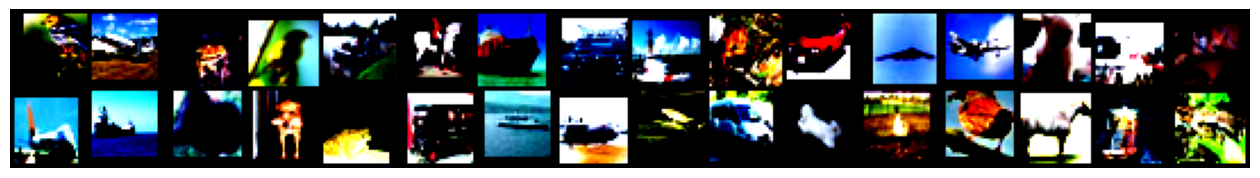

In [12]:
for images, _ in trainer.train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [13]:
trainer.fit()

2023-01-26 16:41.31 [info     ] Start training..
2023-01-26 16:41.31 [info     ] ------------------------------ EPOCH 1 / 150 ------------------------------


100%|██████████| 313/313 [00:04<00:00, 63.89batch/s, loss=1.86, metric=0.322]  


2023-01-26 16:42.19 [info     ] Saving the model.
2023-01-26 16:42.19 [info     ] train loss: 2.0960945359270924 - train metric: 0.22068937939859246
2023-01-26 16:42.19 [info     ] valid loss: 1.8584858978899141 - valid metric: 0.3220846645367412


2023-01-26 16:42.19 [info     ] ------------------------------ EPOCH 2 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 61.12batch/s, loss=1.68, metric=0.387]  


2023-01-26 16:43.07 [info     ] Saving the model.
2023-01-26 16:43.07 [info     ] train loss: 1.7476747465377729 - train metric: 0.3566058861164427
2023-01-26 16:43.07 [info     ] valid loss: 1.6805967183920523 - valid metric: 0.3874800319488818


2023-01-26 16:43.07 [info     ] ------------------------------ EPOCH 3 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.53batch/s, loss=1.56, metric=0.429]  


2023-01-26 16:43.55 [info     ] Saving the model.
2023-01-26 16:43.55 [info     ] train loss: 1.6016409115690644 - train metric: 0.41108845169545744
2023-01-26 16:43.55 [info     ] valid loss: 1.5641151963712308 - valid metric: 0.4290135782747604


2023-01-26 16:43.55 [info     ] ------------------------------ EPOCH 4 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.65batch/s, loss=1.47, metric=0.46]   


2023-01-26 16:44.46 [info     ] Saving the model.
2023-01-26 16:44.46 [info     ] train loss: 1.51022077514358 - train metric: 0.4512356046065259
2023-01-26 16:44.46 [info     ] valid loss: 1.4721142979094777 - valid metric: 0.4602635782747604


2023-01-26 16:44.46 [info     ] ------------------------------ EPOCH 5 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 62.48batch/s, loss=1.4, metric=0.49]    


2023-01-26 16:45.33 [info     ] Saving the model.
2023-01-26 16:45.33 [info     ] train loss: 1.442211769287661 - train metric: 0.47448816378758796
2023-01-26 16:45.33 [info     ] valid loss: 1.4014384340935242 - valid metric: 0.4899161341853035


2023-01-26 16:45.33 [info     ] ------------------------------ EPOCH 6 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.77batch/s, loss=1.38, metric=0.506]  


2023-01-26 16:46.21 [info     ] Saving the model.
2023-01-26 16:46.21 [info     ] train loss: 1.3789945033141153 - train metric: 0.5039187460012796
2023-01-26 16:46.21 [info     ] valid loss: 1.3817216826323122 - valid metric: 0.5061900958466453


2023-01-26 16:46.21 [info     ] ------------------------------ EPOCH 7 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.36batch/s, loss=1.3, metric=0.53]    


2023-01-26 16:47.11 [info     ] Saving the model.
2023-01-26 16:47.11 [info     ] train loss: 1.3371497264521592 - train metric: 0.5198936340371081
2023-01-26 16:47.11 [info     ] valid loss: 1.3035075538836347 - valid metric: 0.5300519169329073


2023-01-26 16:47.11 [info     ] ------------------------------ EPOCH 8 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 60.81batch/s, loss=1.31, metric=0.529]  


2023-01-26 16:47.58 [info     ] Saving the model.
2023-01-26 16:47.58 [info     ] train loss: 1.3100086658411276 - train metric: 0.530610204734485
2023-01-26 16:47.58 [info     ] valid loss: 1.3077841692458327 - valid metric: 0.5290535143769968


2023-01-26 16:47.58 [info     ] ------------------------------ EPOCH 9 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 54.60batch/s, loss=1.26, metric=0.547]  


2023-01-26 16:48.46 [info     ] Saving the model.
2023-01-26 16:48.46 [info     ] train loss: 1.286986056231415 - train metric: 0.536408349328215
2023-01-26 16:48.46 [info     ] valid loss: 1.2603685282670651 - valid metric: 0.5469249201277955


2023-01-26 16:48.46 [info     ] ------------------------------ EPOCH 10 / 150 ------------------------------


100%|██████████| 313/313 [00:04<00:00, 65.40batch/s, loss=1.26, metric=0.55]   


2023-01-26 16:49.31 [info     ] Saving the model.
2023-01-26 16:49.31 [info     ] train loss: 1.2582092621504917 - train metric: 0.5504238643634037
2023-01-26 16:49.31 [info     ] valid loss: 1.2636972159242477 - valid metric: 0.5498202875399361


2023-01-26 16:49.31 [info     ] ------------------------------ EPOCH 11 / 150 ------------------------------


100%|██████████| 313/313 [00:04<00:00, 64.51batch/s, loss=1.25, metric=0.551]  


2023-01-26 16:50.16 [info     ] Saving the model.
2023-01-26 16:50.16 [info     ] train loss: 1.234779603498072 - train metric: 0.5556821817018555
2023-01-26 16:50.16 [info     ] valid loss: 1.2543442125518482 - valid metric: 0.5509185303514377


2023-01-26 16:50.16 [info     ] ------------------------------ EPOCH 12 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.94batch/s, loss=1.24, metric=0.561]  

2023-01-26 16:51.02 [info     ] Saving the model.


2023-01-26 16:51.02 [info     ] train loss: 1.2169206776606754 - train metric: 0.5638995521433141
2023-01-26 16:51.02 [info     ] valid loss: 1.2397636407480452 - valid metric: 0.5613019169329073


2023-01-26 16:51.02 [info     ] ------------------------------ EPOCH 13 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 62.51batch/s, loss=1.17, metric=0.585]  

2023-01-26 16:51.50 [info     ] Saving the model.


2023-01-26 16:51.50 [info     ] train loss: 1.200123303034179 - train metric: 0.5709572936660269
2023-01-26 16:51.50 [info     ] valid loss: 1.170449174631137 - valid metric: 0.5846645367412141


2023-01-26 16:51.50 [info     ] ------------------------------ EPOCH 14 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 61.52batch/s, loss=1.23, metric=0.56]   


2023-01-26 16:52.38 [info     ] Saving the model.
2023-01-26 16:52.38 [info     ] train loss: 1.1780644749039195 - train metric: 0.5792746321177223
2023-01-26 16:52.38 [info     ] valid loss: 1.2284311069467198 - valid metric: 0.5604033546325878


2023-01-26 16:52.38 [info     ] ------------------------------ EPOCH 15 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.36batch/s, loss=1.17, metric=0.583]  


2023-01-26 16:53.27 [info     ] Saving the model.
2023-01-26 16:53.27 [info     ] train loss: 1.1691480270579162 - train metric: 0.5844329814459372
2023-01-26 16:53.27 [info     ] valid loss: 1.1726517161241354 - valid metric: 0.5834664536741214


2023-01-26 16:53.27 [info     ] ------------------------------ EPOCH 16 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 60.86batch/s, loss=1.15, metric=0.591]  


2023-01-26 16:54.15 [info     ] Saving the model.
2023-01-26 16:54.15 [info     ] train loss: 1.1515931478693786 - train metric: 0.5916906589891234
2023-01-26 16:54.15 [info     ] valid loss: 1.1537341681151345 - valid metric: 0.5905551118210862


2023-01-26 16:54.15 [info     ] ------------------------------ EPOCH 17 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.97batch/s, loss=1.17, metric=0.585]  


2023-01-26 16:55.07 [info     ] Saving the model.
2023-01-26 16:55.07 [info     ] train loss: 1.1370592143622562 - train metric: 0.5969889635316699
2023-01-26 16:55.07 [info     ] valid loss: 1.166664147338928 - valid metric: 0.584564696485623


2023-01-26 16:55.07 [info     ] ------------------------------ EPOCH 18 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.12batch/s, loss=1.12, metric=0.603]  


2023-01-26 16:55.59 [info     ] Saving the model.
2023-01-26 16:55.59 [info     ] train loss: 1.1198089113619871 - train metric: 0.5981086052463211
2023-01-26 16:55.59 [info     ] valid loss: 1.1176338784230022 - valid metric: 0.6031349840255591


2023-01-26 16:55.59 [info     ] ------------------------------ EPOCH 19 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.81batch/s, loss=1.11, metric=0.6]    


2023-01-26 16:56.52 [info     ] Saving the model.
2023-01-26 16:56.52 [info     ] train loss: 1.1167281602562351 - train metric: 0.6055262316058861
2023-01-26 16:56.52 [info     ] valid loss: 1.1137580229832342 - valid metric: 0.5995407348242812


2023-01-26 16:56.52 [info     ] ------------------------------ EPOCH 20 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.20batch/s, loss=1.12, metric=0.601]  


2023-01-26 16:57.43 [info     ] Saving the model.
2023-01-26 16:57.43 [info     ] train loss: 1.1009462205019809 - train metric: 0.6095449456174025
2023-01-26 16:57.43 [info     ] valid loss: 1.116736352253265 - valid metric: 0.6014376996805112


2023-01-26 16:57.43 [info     ] ------------------------------ EPOCH 21 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 53.00batch/s, loss=1.11, metric=0.614]  


2023-01-26 16:58.43 [info     ] Saving the model.
2023-01-26 16:58.43 [info     ] train loss: 1.087601332731607 - train metric: 0.6136236404350608
2023-01-26 16:58.43 [info     ] valid loss: 1.1083701026325408 - valid metric: 0.6140175718849841


2023-01-26 16:58.43 [info     ] ------------------------------ EPOCH 22 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.77batch/s, loss=1.08, metric=0.615]  


2023-01-26 16:59.41 [info     ] Saving the model.
2023-01-26 16:59.41 [info     ] train loss: 1.0762904487736165 - train metric: 0.6170225527831094
2023-01-26 16:59.41 [info     ] valid loss: 1.0785128529460286 - valid metric: 0.6146166134185304


2023-01-26 16:59.41 [info     ] ------------------------------ EPOCH 23 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.90batch/s, loss=1.09, metric=0.613]  


2023-01-26 17:00.30 [info     ] Saving the model.
2023-01-26 17:00.30 [info     ] train loss: 1.07122165445174 - train metric: 0.619721689059501
2023-01-26 17:00.30 [info     ] valid loss: 1.094378609817249 - valid metric: 0.6125199680511182


2023-01-26 17:00.30 [info     ] ------------------------------ EPOCH 24 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 60.61batch/s, loss=1.1, metric=0.61]    


2023-01-26 17:01.22 [info     ] Saving the model.
2023-01-26 17:01.22 [info     ] train loss: 1.060083417654495 - train metric: 0.6247800703774792
2023-01-26 17:01.22 [info     ] valid loss: 1.098244330182243 - valid metric: 0.610323482428115


2023-01-26 17:01.22 [info     ] ------------------------------ EPOCH 25 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.20batch/s, loss=1.09, metric=0.61]   


2023-01-26 17:02.14 [info     ] Saving the model.
2023-01-26 17:02.14 [info     ] train loss: 1.0508797585163372 - train metric: 0.6274992002559181
2023-01-26 17:02.14 [info     ] valid loss: 1.0925974554528062 - valid metric: 0.6097244408945687


2023-01-26 17:02.14 [info     ] ------------------------------ EPOCH 26 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.89batch/s, loss=1.08, metric=0.621]  


2023-01-26 17:03.05 [info     ] Saving the model.
2023-01-26 17:03.05 [info     ] train loss: 1.040606010059325 - train metric: 0.6293785988483686
2023-01-26 17:03.05 [info     ] valid loss: 1.0756347274627929 - valid metric: 0.6205071884984026


2023-01-26 17:03.05 [info     ] ------------------------------ EPOCH 27 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 54.95batch/s, loss=1.08, metric=0.622]  

2023-01-26 17:03.59 [info     ] Saving the model.


2023-01-26 17:03.59 [info     ] train loss: 1.0329152069561618 - train metric: 0.6341570697376839
2023-01-26 17:03.59 [info     ] valid loss: 1.0788653618611468 - valid metric: 0.6219049520766773


2023-01-26 17:03.59 [info     ] ------------------------------ EPOCH 28 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.61batch/s, loss=1.06, metric=0.618]  


2023-01-26 17:04.51 [info     ] Saving the model.
2023-01-26 17:04.51 [info     ] train loss: 1.0350501040045603 - train metric: 0.632597568777991
2023-01-26 17:04.51 [info     ] valid loss: 1.0603869753523756 - valid metric: 0.6178115015974441


2023-01-26 17:04.51 [info     ] ------------------------------ EPOCH 29 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.80batch/s, loss=1.04, metric=0.63]   


2023-01-26 17:05.41 [info     ] Saving the model.
2023-01-26 17:05.41 [info     ] train loss: 1.0229499411941414 - train metric: 0.6360564619321817
2023-01-26 17:05.41 [info     ] valid loss: 1.0429966819172087 - valid metric: 0.6301916932907349


2023-01-26 17:05.41 [info     ] ------------------------------ EPOCH 30 / 150 ------------------------------


100%|██████████| 313/313 [00:06<00:00, 51.61batch/s, loss=1.07, metric=0.625]  


2023-01-26 17:06.37 [info     ] Saving the model.
2023-01-26 17:06.37 [info     ] train loss: 1.0117503295742543 - train metric: 0.6426543506078055
2023-01-26 17:06.37 [info     ] valid loss: 1.0671931472830116 - valid metric: 0.6251996805111821


2023-01-26 17:06.37 [info     ] ------------------------------ EPOCH 31 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 54.98batch/s, loss=1.07, metric=0.626]  


2023-01-26 17:07.42 [info     ] Saving the model.
2023-01-26 17:07.42 [info     ] train loss: 1.0097825522424315 - train metric: 0.6449336212412028
2023-01-26 17:07.42 [info     ] valid loss: 1.0674027461594287 - valid metric: 0.6256988817891374


2023-01-26 17:07.42 [info     ] ------------------------------ EPOCH 32 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.06batch/s, loss=1.02, metric=0.64]   


2023-01-26 17:08.32 [info     ] Saving the model.
2023-01-26 17:08.32 [info     ] train loss: 1.0016666873669822 - train metric: 0.6440339091490723
2023-01-26 17:08.32 [info     ] valid loss: 1.023626077860689 - valid metric: 0.6403753993610224


2023-01-26 17:08.32 [info     ] ------------------------------ EPOCH 33 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.65batch/s, loss=1.02, metric=0.64]   


2023-01-26 17:09.22 [info     ] Saving the model.
2023-01-26 17:09.22 [info     ] train loss: 0.9990160454372069 - train metric: 0.6458333333333334
2023-01-26 17:09.22 [info     ] valid loss: 1.0236631661367874 - valid metric: 0.639576677316294


2023-01-26 17:09.22 [info     ] ------------------------------ EPOCH 34 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.38batch/s, loss=1.01, metric=0.647]  


2023-01-26 17:10.12 [info     ] Saving the model.
2023-01-26 17:10.12 [info     ] train loss: 0.9888086296470212 - train metric: 0.6501719449776072
2023-01-26 17:10.12 [info     ] valid loss: 1.0062471747207946 - valid metric: 0.6467651757188498


2023-01-26 17:10.12 [info     ] ------------------------------ EPOCH 35 / 150 ------------------------------


100%|██████████| 313/313 [00:04<00:00, 64.67batch/s, loss=1.03, metric=0.643]  


2023-01-26 17:11.01 [info     ] Saving the model.
2023-01-26 17:11.01 [info     ] train loss: 0.9812256282747212 - train metric: 0.6514915227127319
2023-01-26 17:11.01 [info     ] valid loss: 1.034645229292373 - valid metric: 0.6430710862619808


2023-01-26 17:11.01 [info     ] ------------------------------ EPOCH 36 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.07batch/s, loss=0.994, metric=0.647] 


2023-01-26 17:11.54 [info     ] Saving the model.
2023-01-26 17:11.54 [info     ] train loss: 0.9769509631094075 - train metric: 0.6519113883557262
2023-01-26 17:11.54 [info     ] valid loss: 0.9940672900539618 - valid metric: 0.6474640575079872


2023-01-26 17:11.54 [info     ] ------------------------------ EPOCH 37 / 150 ------------------------------


100%|██████████| 313/313 [00:06<00:00, 51.30batch/s, loss=1, metric=0.647]     


2023-01-26 17:12.53 [info     ] Saving the model.
2023-01-26 17:12.53 [info     ] train loss: 0.968752516551576 - train metric: 0.6556301983365324
2023-01-26 17:12.53 [info     ] valid loss: 1.0031294674157334 - valid metric: 0.6466653354632588


2023-01-26 17:12.53 [info     ] ------------------------------ EPOCH 38 / 150 ------------------------------


100%|██████████| 313/313 [00:06<00:00, 47.82batch/s, loss=1.02, metric=0.636]  


2023-01-26 17:14.01 [info     ] Saving the model.
2023-01-26 17:14.01 [info     ] train loss: 0.9677811790107537 - train metric: 0.6559500959692899
2023-01-26 17:14.01 [info     ] valid loss: 1.023019900337195 - valid metric: 0.635882587859425


2023-01-26 17:14.01 [info     ] ------------------------------ EPOCH 39 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.53batch/s, loss=0.975, metric=0.659] 


2023-01-26 17:14.53 [info     ] Saving the model.
2023-01-26 17:14.53 [info     ] train loss: 0.9660071157638797 - train metric: 0.6582493602047345
2023-01-26 17:14.53 [info     ] valid loss: 0.9750909849096792 - valid metric: 0.6587460063897763


2023-01-26 17:14.53 [info     ] ------------------------------ EPOCH 40 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.27batch/s, loss=1, metric=0.647]     


2023-01-26 17:15.43 [info     ] Saving the model.
2023-01-26 17:15.43 [info     ] train loss: 0.9535927537230444 - train metric: 0.6600487843889955
2023-01-26 17:15.43 [info     ] valid loss: 1.000291839194374 - valid metric: 0.647064696485623


2023-01-26 17:15.43 [info     ] ------------------------------ EPOCH 41 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.60batch/s, loss=0.998, metric=0.646] 


2023-01-26 17:16.33 [info     ] Saving the model.
2023-01-26 17:16.33 [info     ] train loss: 0.9577263031757877 - train metric: 0.6599888035828535
2023-01-26 17:16.33 [info     ] valid loss: 0.9976680699628763 - valid metric: 0.6462659744408946


2023-01-26 17:16.33 [info     ] ------------------------------ EPOCH 42 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.89batch/s, loss=1, metric=0.649]     

2023-01-26 17:17.25 [info     ] Saving the model.


2023-01-26 17:17.25 [info     ] train loss: 0.9523772493967702 - train metric: 0.662627959053103
2023-01-26 17:17.25 [info     ] valid loss: 1.002007411215633 - valid metric: 0.6487619808306709


2023-01-26 17:17.25 [info     ] ------------------------------ EPOCH 43 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.70batch/s, loss=0.998, metric=0.65]  


2023-01-26 17:18.17 [info     ] Saving the model.
2023-01-26 17:18.17 [info     ] train loss: 0.9456750285297498 - train metric: 0.6647472808701216
2023-01-26 17:18.17 [info     ] valid loss: 0.9979505059056388 - valid metric: 0.6498602236421726


2023-01-26 17:18.17 [info     ] ------------------------------ EPOCH 44 / 150 ------------------------------


100%|██████████| 313/313 [00:04<00:00, 63.62batch/s, loss=0.985, metric=0.657] 


2023-01-26 17:19.09 [info     ] Saving the model.
2023-01-26 17:19.09 [info     ] train loss: 0.9386163511988602 - train metric: 0.6684061100447857
2023-01-26 17:19.09 [info     ] valid loss: 0.9849393843842772 - valid metric: 0.6568490415335463


2023-01-26 17:19.09 [info     ] ------------------------------ EPOCH 45 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 61.99batch/s, loss=0.985, metric=0.65]  


2023-01-26 17:20.01 [info     ] Saving the model.
2023-01-26 17:20.01 [info     ] train loss: 0.9369990361362257 - train metric: 0.668426103646833
2023-01-26 17:20.01 [info     ] valid loss: 0.9854585427445726 - valid metric: 0.6497603833865815


2023-01-26 17:20.01 [info     ] ------------------------------ EPOCH 46 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.22batch/s, loss=0.985, metric=0.659] 


2023-01-26 17:20.53 [info     ] Saving the model.
2023-01-26 17:20.53 [info     ] train loss: 0.9284959416967589 - train metric: 0.6705254318618042
2023-01-26 17:20.53 [info     ] valid loss: 0.9846768683899706 - valid metric: 0.6591453674121406


2023-01-26 17:20.53 [info     ] ------------------------------ EPOCH 47 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.69batch/s, loss=0.97, metric=0.66]   


2023-01-26 17:21.44 [info     ] Saving the model.
2023-01-26 17:21.44 [info     ] train loss: 0.9274407821020406 - train metric: 0.6729846449136276
2023-01-26 17:21.44 [info     ] valid loss: 0.9698123622435731 - valid metric: 0.659944089456869


2023-01-26 17:21.44 [info     ] ------------------------------ EPOCH 48 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.83batch/s, loss=0.992, metric=0.648] 


2023-01-26 17:22.38 [info     ] Saving the model.
2023-01-26 17:22.38 [info     ] train loss: 0.9259297168948906 - train metric: 0.6726647472808701
2023-01-26 17:22.38 [info     ] valid loss: 0.9922611233525382 - valid metric: 0.6476637380191693


2023-01-26 17:22.38 [info     ] ------------------------------ EPOCH 49 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.12batch/s, loss=0.982, metric=0.653] 


2023-01-26 17:23.27 [info     ] Saving the model.
2023-01-26 17:23.27 [info     ] train loss: 0.928603374588131 - train metric: 0.6730446257197696
2023-01-26 17:23.27 [info     ] valid loss: 0.9822135310584363 - valid metric: 0.6526557507987221


2023-01-26 17:23.27 [info     ] ------------------------------ EPOCH 50 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.45batch/s, loss=0.986, metric=0.656]  


2023-01-26 17:24.17 [info     ] Saving the model.
2023-01-26 17:24.17 [info     ] train loss: 0.9164358560122211 - train metric: 0.6759237044145874
2023-01-26 17:24.17 [info     ] valid loss: 0.9857092925344413 - valid metric: 0.65625


2023-01-26 17:24.17 [info     ] ------------------------------ EPOCH 51 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 60.54batch/s, loss=0.981, metric=0.651] 


2023-01-26 17:25.10 [info     ] Saving the model.
2023-01-26 17:25.10 [info     ] train loss: 0.9169918217684928 - train metric: 0.6749240243122201
2023-01-26 17:25.10 [info     ] valid loss: 0.9811536475492362 - valid metric: 0.650658945686901


2023-01-26 17:25.10 [info     ] ------------------------------ EPOCH 52 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.94batch/s, loss=0.995, metric=0.659] 


2023-01-26 17:26.10 [info     ] Saving the model.
2023-01-26 17:26.10 [info     ] train loss: 0.9155448097604555 - train metric: 0.674224248240563
2023-01-26 17:26.10 [info     ] valid loss: 0.9952149223595762 - valid metric: 0.6591453674121406


2023-01-26 17:26.10 [info     ] ------------------------------ EPOCH 53 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 41.82batch/s, loss=0.951, metric=0.668] 

2023-01-26 17:27.41 [info     ] Saving the model.


2023-01-26 17:27.41 [info     ] train loss: 0.9107478359381663 - train metric: 0.6799824056301983
2023-01-26 17:27.41 [info     ] valid loss: 0.950724005984803 - valid metric: 0.6675319488817891


2023-01-26 17:27.41 [info     ] ------------------------------ EPOCH 54 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.80batch/s, loss=0.957, metric=0.66]  


2023-01-26 17:28.45 [info     ] Saving the model.
2023-01-26 17:28.45 [info     ] train loss: 0.9112407568739685 - train metric: 0.6789627319257837
2023-01-26 17:28.45 [info     ] valid loss: 0.9566604515043692 - valid metric: 0.6597444089456869


2023-01-26 17:28.45 [info     ] ------------------------------ EPOCH 55 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.34batch/s, loss=0.94, metric=0.673]  


2023-01-26 17:29.38 [info     ] Saving the model.
2023-01-26 17:29.38 [info     ] train loss: 0.9078545001784122 - train metric: 0.6782029750479847
2023-01-26 17:29.38 [info     ] valid loss: 0.9399482278397289 - valid metric: 0.6731230031948882


2023-01-26 17:29.38 [info     ] ------------------------------ EPOCH 56 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.10batch/s, loss=0.942, metric=0.669] 


2023-01-26 17:30.29 [info     ] Saving the model.
2023-01-26 17:30.29 [info     ] train loss: 0.900210950630869 - train metric: 0.6802023352527191
2023-01-26 17:30.29 [info     ] valid loss: 0.9423286825323257 - valid metric: 0.6686301916932907


2023-01-26 17:30.29 [info     ] ------------------------------ EPOCH 57 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.28batch/s, loss=0.969, metric=0.665] 


2023-01-26 17:31.20 [info     ] Saving the model.
2023-01-26 17:31.20 [info     ] train loss: 0.8981258896246829 - train metric: 0.6807621561100448
2023-01-26 17:31.20 [info     ] valid loss: 0.9686830794087614 - valid metric: 0.6651357827476039


2023-01-26 17:31.20 [info     ] ------------------------------ EPOCH 58 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.55batch/s, loss=0.978, metric=0.659] 


2023-01-26 17:32.12 [info     ] Saving the model.
2023-01-26 17:32.12 [info     ] train loss: 0.894099573656602 - train metric: 0.6824416186820218
2023-01-26 17:32.12 [info     ] valid loss: 0.9775250476008406 - valid metric: 0.6594448881789138


2023-01-26 17:32.12 [info     ] ------------------------------ EPOCH 59 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.28batch/s, loss=0.963, metric=0.662] 


2023-01-26 17:33.05 [info     ] Saving the model.
2023-01-26 17:33.05 [info     ] train loss: 0.8934446379342144 - train metric: 0.6845009596928983
2023-01-26 17:33.05 [info     ] valid loss: 0.9626748082927241 - valid metric: 0.6622404153354633


2023-01-26 17:33.05 [info     ] ------------------------------ EPOCH 60 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 60.23batch/s, loss=0.973, metric=0.661] 


2023-01-26 17:33.58 [info     ] Saving the model.
2023-01-26 17:33.58 [info     ] train loss: 0.8825444904223361 - train metric: 0.6871601087651952
2023-01-26 17:33.58 [info     ] valid loss: 0.9733122070186054 - valid metric: 0.6605431309904153


2023-01-26 17:33.58 [info     ] ------------------------------ EPOCH 61 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.95batch/s, loss=0.972, metric=0.66]  


2023-01-26 17:34.49 [info     ] Saving the model.
2023-01-26 17:34.49 [info     ] train loss: 0.8879004013095997 - train metric: 0.6861404350607806
2023-01-26 17:34.49 [info     ] valid loss: 0.9716473840676938 - valid metric: 0.6604432907348243


2023-01-26 17:34.49 [info     ] ------------------------------ EPOCH 62 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.75batch/s, loss=0.957, metric=0.665] 


2023-01-26 17:35.40 [info     ] Saving the model.
2023-01-26 17:35.40 [info     ] train loss: 0.8779897126950138 - train metric: 0.6916586692258477
2023-01-26 17:35.40 [info     ] valid loss: 0.9569320636816299 - valid metric: 0.6649361022364217


2023-01-26 17:35.40 [info     ] ------------------------------ EPOCH 63 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.12batch/s, loss=0.937, metric=0.671] 


2023-01-26 17:36.33 [info     ] Saving the model.
2023-01-26 17:36.33 [info     ] train loss: 0.8835862624439306 - train metric: 0.6894593730006398
2023-01-26 17:36.33 [info     ] valid loss: 0.9372446129497248 - valid metric: 0.6713258785942492


2023-01-26 17:36.33 [info     ] ------------------------------ EPOCH 64 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.59batch/s, loss=0.937, metric=0.672] 


2023-01-26 17:37.25 [info     ] Saving the model.
2023-01-26 17:37.25 [info     ] train loss: 0.881591431848986 - train metric: 0.6876999360204734
2023-01-26 17:37.25 [info     ] valid loss: 0.9368775323176155 - valid metric: 0.6719249201277955


2023-01-26 17:37.25 [info     ] ------------------------------ EPOCH 65 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 54.98batch/s, loss=0.953, metric=0.668] 


2023-01-26 17:38.18 [info     ] Saving the model.
2023-01-26 17:38.18 [info     ] train loss: 0.87846838020775 - train metric: 0.6877599168266155
2023-01-26 17:38.18 [info     ] valid loss: 0.9532787995026134 - valid metric: 0.6679313099041534


2023-01-26 17:38.18 [info     ] ------------------------------ EPOCH 66 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 60.74batch/s, loss=0.952, metric=0.67]  

2023-01-26 17:39.11 [info     ] Saving the model.


2023-01-26 17:39.11 [info     ] train loss: 0.8852255220071521 - train metric: 0.6884796865003199
2023-01-26 17:39.11 [info     ] valid loss: 0.9516283774528259 - valid metric: 0.6696285942492013


2023-01-26 17:39.11 [info     ] ------------------------------ EPOCH 67 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 62.57batch/s, loss=0.914, metric=0.68]  


2023-01-26 17:40.04 [info     ] Saving the model.
2023-01-26 17:40.04 [info     ] train loss: 0.8712014857005097 - train metric: 0.692658349328215
2023-01-26 17:40.04 [info     ] valid loss: 0.9141815458052456 - valid metric: 0.6802116613418531


2023-01-26 17:40.04 [info     ] ------------------------------ EPOCH 68 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.64batch/s, loss=0.922, metric=0.677] 


2023-01-26 17:40.56 [info     ] Saving the model.
2023-01-26 17:40.56 [info     ] train loss: 0.8721618602768549 - train metric: 0.6928582853486884
2023-01-26 17:40.56 [info     ] valid loss: 0.9216984665622345 - valid metric: 0.6774161341853036


2023-01-26 17:40.56 [info     ] ------------------------------ EPOCH 69 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.80batch/s, loss=0.938, metric=0.674] 

2023-01-26 17:41.50 [info     ] Saving the model.


2023-01-26 17:41.50 [info     ] train loss: 0.8743624036615656 - train metric: 0.6902191298784389
2023-01-26 17:41.50 [info     ] valid loss: 0.9378886188561923 - valid metric: 0.6740215654952076


2023-01-26 17:41.50 [info     ] ------------------------------ EPOCH 70 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.42batch/s, loss=0.947, metric=0.665] 


2023-01-26 17:42.41 [info     ] Saving the model.
2023-01-26 17:42.41 [info     ] train loss: 0.8687167031522447 - train metric: 0.690519033909149
2023-01-26 17:42.41 [info     ] valid loss: 0.9467615866051695 - valid metric: 0.6651357827476039


2023-01-26 17:42.41 [info     ] ------------------------------ EPOCH 71 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.60batch/s, loss=0.948, metric=0.669] 


2023-01-26 17:43.31 [info     ] Saving the model.
2023-01-26 17:43.31 [info     ] train loss: 0.8658433937332375 - train metric: 0.6945977287268075
2023-01-26 17:43.31 [info     ] valid loss: 0.9479624331949618 - valid metric: 0.669129392971246


2023-01-26 17:43.31 [info     ] ------------------------------ EPOCH 72 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.60batch/s, loss=0.944, metric=0.668] 

2023-01-26 17:44.25 [info     ] Saving the model.


2023-01-26 17:44.25 [info     ] train loss: 0.8664633352941072 - train metric: 0.6954174664107485
2023-01-26 17:44.25 [info     ] valid loss: 0.9436353286996055 - valid metric: 0.6675319488817891


2023-01-26 17:44.25 [info     ] ------------------------------ EPOCH 73 / 150 ------------------------------


100%|██████████| 313/313 [00:04<00:00, 66.56batch/s, loss=0.946, metric=0.671] 


2023-01-26 17:45.15 [info     ] Saving the model.
2023-01-26 17:45.15 [info     ] train loss: 0.8628198269347083 - train metric: 0.6946777031349968
2023-01-26 17:45.15 [info     ] valid loss: 0.9464343861459543 - valid metric: 0.6714257188498403


2023-01-26 17:45.15 [info     ] ------------------------------ EPOCH 74 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.94batch/s, loss=0.95, metric=0.664]  

2023-01-26 17:46.06 [info     ] Saving the model.


2023-01-26 17:46.06 [info     ] train loss: 0.865749914087093 - train metric: 0.6926783429302623
2023-01-26 17:46.06 [info     ] valid loss: 0.9496758656379894 - valid metric: 0.6641373801916933


2023-01-26 17:46.06 [info     ] ------------------------------ EPOCH 75 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 59.36batch/s, loss=0.977, metric=0.655] 


2023-01-26 17:47.00 [info     ] Saving the model.
2023-01-26 17:47.00 [info     ] train loss: 0.8640282686253961 - train metric: 0.692718330134357
2023-01-26 17:47.00 [info     ] valid loss: 0.9774364611973017 - valid metric: 0.6551517571884984


2023-01-26 17:47.00 [info     ] ------------------------------ EPOCH 76 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.21batch/s, loss=0.926, metric=0.676] 


2023-01-26 17:47.54 [info     ] Saving the model.
2023-01-26 17:47.54 [info     ] train loss: 0.8564667696763671 - train metric: 0.6973168586052463
2023-01-26 17:47.54 [info     ] valid loss: 0.9261558990889844 - valid metric: 0.6763178913738019


2023-01-26 17:47.54 [info     ] ------------------------------ EPOCH 77 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.30batch/s, loss=0.924, metric=0.679] 


2023-01-26 17:48.49 [info     ] Saving the model.
2023-01-26 17:48.49 [info     ] train loss: 0.8534848975281035 - train metric: 0.6975167946257198
2023-01-26 17:48.49 [info     ] valid loss: 0.924124153753439 - valid metric: 0.6785143769968051


2023-01-26 17:48.49 [info     ] ------------------------------ EPOCH 78 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.40batch/s, loss=0.918, metric=0.682] 


2023-01-26 17:49.43 [info     ] Saving the model.
2023-01-26 17:49.43 [info     ] train loss: 0.8509879206055185 - train metric: 0.6987563979526551
2023-01-26 17:49.43 [info     ] valid loss: 0.9175411430410684 - valid metric: 0.6818091054313099


2023-01-26 17:49.43 [info     ] ------------------------------ EPOCH 79 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.45batch/s, loss=0.92, metric=0.678]  


2023-01-26 17:50.39 [info     ] Saving the model.
2023-01-26 17:50.39 [info     ] train loss: 0.8545138137468679 - train metric: 0.6966370761356366
2023-01-26 17:50.39 [info     ] valid loss: 0.9203095104747687 - valid metric: 0.6784145367412141


2023-01-26 17:50.39 [info     ] ------------------------------ EPOCH 80 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.18batch/s, loss=0.944, metric=0.673] 


2023-01-26 17:51.38 [info     ] Saving the model.
2023-01-26 17:51.38 [info     ] train loss: 0.8505182816520076 - train metric: 0.7008157389635317
2023-01-26 17:51.38 [info     ] valid loss: 0.9437185006971938 - valid metric: 0.672923322683706


2023-01-26 17:51.38 [info     ] ------------------------------ EPOCH 81 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.64batch/s, loss=0.911, metric=0.681] 


2023-01-26 17:52.37 [info     ] Saving the model.
2023-01-26 17:52.37 [info     ] train loss: 0.847091022776398 - train metric: 0.7015754958413307
2023-01-26 17:52.37 [info     ] valid loss: 0.9108866593136955 - valid metric: 0.6807108626198083


2023-01-26 17:52.37 [info     ] ------------------------------ EPOCH 82 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.35batch/s, loss=0.892, metric=0.694] 


2023-01-26 17:53.35 [info     ] Saving the model.
2023-01-26 17:53.35 [info     ] train loss: 0.8540114179606325 - train metric: 0.6976367562380038
2023-01-26 17:53.35 [info     ] valid loss: 0.8919699557673055 - valid metric: 0.6937899361022364


2023-01-26 17:53.35 [info     ] ------------------------------ EPOCH 83 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.12batch/s, loss=0.965, metric=0.655] 


2023-01-26 17:54.33 [info     ] Saving the model.
2023-01-26 17:54.33 [info     ] train loss: 0.8421906195271114 - train metric: 0.7014955214331414
2023-01-26 17:54.33 [info     ] valid loss: 0.9652048608365531 - valid metric: 0.6553514376996805


2023-01-26 17:54.33 [info     ] ------------------------------ EPOCH 84 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.32batch/s, loss=0.932, metric=0.676] 


2023-01-26 17:55.30 [info     ] Saving the model.
2023-01-26 17:55.30 [info     ] train loss: 0.8430955192635475 - train metric: 0.7046345169545746
2023-01-26 17:55.30 [info     ] valid loss: 0.9322092044658173 - valid metric: 0.6760183706070287


2023-01-26 17:55.30 [info     ] ------------------------------ EPOCH 85 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.10batch/s, loss=0.927, metric=0.678] 


2023-01-26 17:56.27 [info     ] Saving the model.
2023-01-26 17:56.27 [info     ] train loss: 0.8455985723705682 - train metric: 0.7005158349328215
2023-01-26 17:56.27 [info     ] valid loss: 0.9271829492939166 - valid metric: 0.6777156549520766


2023-01-26 17:56.27 [info     ] ------------------------------ EPOCH 86 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.96batch/s, loss=0.913, metric=0.678] 


2023-01-26 17:57.24 [info     ] Saving the model.
2023-01-26 17:57.24 [info     ] train loss: 0.8421452696019842 - train metric: 0.7028350927703135
2023-01-26 17:57.24 [info     ] valid loss: 0.9129486183960217 - valid metric: 0.6779153354632588


2023-01-26 17:57.24 [info     ] ------------------------------ EPOCH 87 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 54.44batch/s, loss=0.93, metric=0.67]   


2023-01-26 17:58.20 [info     ] Saving the model.
2023-01-26 17:58.20 [info     ] train loss: 0.8383926149941529 - train metric: 0.7051543506078055
2023-01-26 17:58.20 [info     ] valid loss: 0.9300170429407979 - valid metric: 0.6704273162939297


2023-01-26 17:58.20 [info     ] ------------------------------ EPOCH 88 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.43batch/s, loss=0.923, metric=0.676] 


2023-01-26 17:59.17 [info     ] Saving the model.
2023-01-26 17:59.17 [info     ] train loss: 0.8416481077747321 - train metric: 0.7032749520153551
2023-01-26 17:59.17 [info     ] valid loss: 0.9233522246630428 - valid metric: 0.6763178913738019


2023-01-26 17:59.17 [info     ] ------------------------------ EPOCH 89 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.25batch/s, loss=0.914, metric=0.681] 


2023-01-26 18:00.16 [info     ] Saving the model.
2023-01-26 18:00.16 [info     ] train loss: 0.8437740483386198 - train metric: 0.7013755598208573
2023-01-26 18:00.16 [info     ] valid loss: 0.9137012327250581 - valid metric: 0.6807108626198083


2023-01-26 18:00.16 [info     ] ------------------------------ EPOCH 90 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 52.74batch/s, loss=0.899, metric=0.687] 


2023-01-26 18:01.12 [info     ] Saving the model.
2023-01-26 18:01.12 [info     ] train loss: 0.8341943387297278 - train metric: 0.7063339731285988
2023-01-26 18:01.12 [info     ] valid loss: 0.8987640089120347 - valid metric: 0.6865015974440895


2023-01-26 18:01.12 [info     ] ------------------------------ EPOCH 91 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 58.08batch/s, loss=0.923, metric=0.673] 


2023-01-26 18:02.10 [info     ] Saving the model.
2023-01-26 18:02.10 [info     ] train loss: 0.832580941347304 - train metric: 0.7084732885476648
2023-01-26 18:02.10 [info     ] valid loss: 0.922958776116752 - valid metric: 0.672923322683706


2023-01-26 18:02.10 [info     ] ------------------------------ EPOCH 92 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.99batch/s, loss=0.901, metric=0.689] 


2023-01-26 18:03.07 [info     ] Saving the model.
2023-01-26 18:03.07 [info     ] train loss: 0.8299831633985767 - train metric: 0.7074736084452975
2023-01-26 18:03.07 [info     ] valid loss: 0.9010370297553821 - valid metric: 0.68939696485623


2023-01-26 18:03.07 [info     ] ------------------------------ EPOCH 93 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.80batch/s, loss=0.906, metric=0.686] 


2023-01-26 18:04.05 [info     ] Saving the model.
2023-01-26 18:04.05 [info     ] train loss: 0.8303260618459698 - train metric: 0.708193378119002
2023-01-26 18:04.05 [info     ] valid loss: 0.9058825632634635 - valid metric: 0.6858027156549521


2023-01-26 18:04.05 [info     ] ------------------------------ EPOCH 94 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 57.87batch/s, loss=0.888, metric=0.687] 


2023-01-26 18:05.02 [info     ] Saving the model.
2023-01-26 18:05.02 [info     ] train loss: 0.8303233594064596 - train metric: 0.707093730006398
2023-01-26 18:05.02 [info     ] valid loss: 0.888118992693508 - valid metric: 0.6874001597444089


2023-01-26 18:05.02 [info     ] ------------------------------ EPOCH 95 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 56.00batch/s, loss=0.893, metric=0.688] 


2023-01-26 18:06.00 [info     ] Saving the model.
2023-01-26 18:06.00 [info     ] train loss: 0.8301680690381897 - train metric: 0.7046345169545746
2023-01-26 18:06.00 [info     ] valid loss: 0.8928311522395466 - valid metric: 0.6877995207667732


2023-01-26 18:06.00 [info     ] ------------------------------ EPOCH 96 / 150 ------------------------------


100%|██████████| 313/313 [00:05<00:00, 55.84batch/s, loss=0.944, metric=0.673] 


2023-01-26 18:06.57 [info     ] Saving the model.
2023-01-26 18:06.57 [info     ] train loss: 0.8316020334445736 - train metric: 0.7069737683941139
2023-01-26 18:06.57 [info     ] valid loss: 0.9435146411006062 - valid metric: 0.6726238019169329


2023-01-26 18:06.57 [info     ] ------------------------------ EPOCH 97 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 35.84batch/s, loss=0.959, metric=0.666]  


2023-01-26 18:08.13 [info     ] Saving the model.
2023-01-26 18:08.13 [info     ] train loss: 0.8267311424264828 - train metric: 0.7072936660268714
2023-01-26 18:08.13 [info     ] valid loss: 0.958662638363366 - valid metric: 0.6660343450479234


2023-01-26 18:08.13 [info     ] ------------------------------ EPOCH 98 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 35.92batch/s, loss=0.926, metric=0.679]  


2023-01-26 18:09.32 [info     ] Saving the model.
2023-01-26 18:09.32 [info     ] train loss: 0.8257427368305924 - train metric: 0.7087132117722329
2023-01-26 18:09.32 [info     ] valid loss: 0.9263815658922774 - valid metric: 0.6791134185303515


2023-01-26 18:09.32 [info     ] ------------------------------ EPOCH 99 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 36.07batch/s, loss=0.962, metric=0.666]  


2023-01-26 18:10.54 [info     ] Saving the model.
2023-01-26 18:10.54 [info     ] train loss: 0.8241457967749026 - train metric: 0.7089931222008957
2023-01-26 18:10.54 [info     ] valid loss: 0.9624179397909024 - valid metric: 0.6657348242811502


2023-01-26 18:10.54 [info     ] ------------------------------ EPOCH 100 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.78batch/s, loss=0.89, metric=0.688]  


2023-01-26 18:12.13 [info     ] Saving the model.
2023-01-26 18:12.13 [info     ] train loss: 0.8280436787480203 - train metric: 0.7073336532309661
2023-01-26 18:12.13 [info     ] valid loss: 0.8903234164935713 - valid metric: 0.6877995207667732


2023-01-26 18:12.13 [info     ] ------------------------------ EPOCH 101 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.39batch/s, loss=0.925, metric=0.682] 


2023-01-26 18:13.33 [info     ] Saving the model.
2023-01-26 18:13.33 [info     ] train loss: 0.8265044183320749 - train metric: 0.7076135636596289
2023-01-26 18:13.33 [info     ] valid loss: 0.925020770904736 - valid metric: 0.6815095846645367


2023-01-26 18:13.33 [info     ] ------------------------------ EPOCH 102 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.58batch/s, loss=0.904, metric=0.69]   


2023-01-26 18:14.50 [info     ] Saving the model.
2023-01-26 18:14.50 [info     ] train loss: 0.8227713335727318 - train metric: 0.710052783109405
2023-01-26 18:14.50 [info     ] valid loss: 0.9038427821553934 - valid metric: 0.6895966453674122


2023-01-26 18:14.50 [info     ] ------------------------------ EPOCH 103 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.31batch/s, loss=0.924, metric=0.676] 


2023-01-26 18:16.10 [info     ] Saving the model.
2023-01-26 18:16.10 [info     ] train loss: 0.8186284361057989 - train metric: 0.7113723608445297
2023-01-26 18:16.10 [info     ] valid loss: 0.9239688506141638 - valid metric: 0.6763178913738019


2023-01-26 18:16.10 [info     ] ------------------------------ EPOCH 104 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 39.06batch/s, loss=0.908, metric=0.687]  


2023-01-26 18:17.28 [info     ] Saving the model.
2023-01-26 18:17.28 [info     ] train loss: 0.8198434062974238 - train metric: 0.7116922584772872
2023-01-26 18:17.28 [info     ] valid loss: 0.9079387995381706 - valid metric: 0.6868011182108626


2023-01-26 18:17.28 [info     ] ------------------------------ EPOCH 105 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.40batch/s, loss=0.896, metric=0.688] 


2023-01-26 18:18.46 [info     ] Saving the model.
2023-01-26 18:18.46 [info     ] train loss: 0.8183518284341882 - train metric: 0.7106925783749201
2023-01-26 18:18.46 [info     ] valid loss: 0.8957528502415544 - valid metric: 0.6875998402555911


2023-01-26 18:18.46 [info     ] ------------------------------ EPOCH 106 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 41.36batch/s, loss=0.895, metric=0.69]  


2023-01-26 18:20.02 [info     ] Saving the model.
2023-01-26 18:20.02 [info     ] train loss: 0.8147913649039473 - train metric: 0.7113723608445297
2023-01-26 18:20.02 [info     ] valid loss: 0.8954521589004956 - valid metric: 0.6897963258785943


2023-01-26 18:20.02 [info     ] ------------------------------ EPOCH 107 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.29batch/s, loss=0.903, metric=0.686] 


2023-01-26 18:21.20 [info     ] Saving the model.
2023-01-26 18:21.20 [info     ] train loss: 0.8185412081402994 - train metric: 0.7107525591810621
2023-01-26 18:21.20 [info     ] valid loss: 0.9026274176451344 - valid metric: 0.6863019169329073


2023-01-26 18:21.20 [info     ] ------------------------------ EPOCH 108 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.61batch/s, loss=0.898, metric=0.689] 


2023-01-26 18:22.41 [info     ] Saving the model.
2023-01-26 18:22.41 [info     ] train loss: 0.8135677354502052 - train metric: 0.7115922904670505
2023-01-26 18:22.41 [info     ] valid loss: 0.8976134948265819 - valid metric: 0.6891972843450479


2023-01-26 18:22.41 [info     ] ------------------------------ EPOCH 109 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.74batch/s, loss=0.904, metric=0.679] 


2023-01-26 18:23.59 [info     ] Saving the model.
2023-01-26 18:23.59 [info     ] train loss: 0.8156773726946257 - train metric: 0.713471689059501
2023-01-26 18:23.59 [info     ] valid loss: 0.9037692647772475 - valid metric: 0.6791134185303515


2023-01-26 18:23.59 [info     ] ------------------------------ EPOCH 110 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.39batch/s, loss=0.914, metric=0.68]  


2023-01-26 18:25.16 [info     ] Saving the model.
2023-01-26 18:25.16 [info     ] train loss: 0.81567909819761 - train metric: 0.7104126679462572
2023-01-26 18:25.16 [info     ] valid loss: 0.9139400030286929 - valid metric: 0.6795127795527156


2023-01-26 18:25.16 [info     ] ------------------------------ EPOCH 111 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.62batch/s, loss=0.904, metric=0.687] 


2023-01-26 18:26.35 [info     ] Saving the model.
2023-01-26 18:26.35 [info     ] train loss: 0.8067540888289039 - train metric: 0.7157509596928983
2023-01-26 18:26.35 [info     ] valid loss: 0.9043767199920009 - valid metric: 0.6871006389776357


2023-01-26 18:26.35 [info     ] ------------------------------ EPOCH 112 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.96batch/s, loss=0.89, metric=0.686]  


2023-01-26 18:27.55 [info     ] Saving the model.
2023-01-26 18:27.55 [info     ] train loss: 0.8084425479078323 - train metric: 0.7154510556621881
2023-01-26 18:27.55 [info     ] valid loss: 0.8900577765874589 - valid metric: 0.6860023961661342


2023-01-26 18:27.55 [info     ] ------------------------------ EPOCH 113 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.05batch/s, loss=0.901, metric=0.685] 


2023-01-26 18:29.13 [info     ] Saving the model.
2023-01-26 18:29.13 [info     ] train loss: 0.8120191061412838 - train metric: 0.7149912028150992
2023-01-26 18:29.13 [info     ] valid loss: 0.9011082544494361 - valid metric: 0.6848043130990416


2023-01-26 18:29.13 [info     ] ------------------------------ EPOCH 114 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.73batch/s, loss=0.95, metric=0.672]  


2023-01-26 18:30.33 [info     ] Saving the model.
2023-01-26 18:30.33 [info     ] train loss: 0.8127658236545396 - train metric: 0.7147312859884837
2023-01-26 18:30.33 [info     ] valid loss: 0.9497741968296587 - valid metric: 0.6721246006389776


2023-01-26 18:30.33 [info     ] ------------------------------ EPOCH 115 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.14batch/s, loss=0.905, metric=0.691] 


2023-01-26 18:31.51 [info     ] Saving the model.
2023-01-26 18:31.51 [info     ] train loss: 0.8120588995826146 - train metric: 0.7137316058861164
2023-01-26 18:31.51 [info     ] valid loss: 0.9052942386640909 - valid metric: 0.6908945686900958


2023-01-26 18:31.51 [info     ] ------------------------------ EPOCH 116 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.36batch/s, loss=0.92, metric=0.679]  


2023-01-26 18:33.11 [info     ] Saving the model.
2023-01-26 18:33.11 [info     ] train loss: 0.8074955853299307 - train metric: 0.7151911388355726
2023-01-26 18:33.11 [info     ] valid loss: 0.9204268240319273 - valid metric: 0.6793130990415336


2023-01-26 18:33.11 [info     ] ------------------------------ EPOCH 117 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.20batch/s, loss=0.878, metric=0.698] 

2023-01-26 18:34.31 [info     ] Saving the model.


2023-01-26 18:34.31 [info     ] train loss: 0.8072152152628908 - train metric: 0.7147312859884837
2023-01-26 18:34.31 [info     ] valid loss: 0.8778890579843673 - valid metric: 0.6979832268370607


2023-01-26 18:34.31 [info     ] ------------------------------ EPOCH 118 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.13batch/s, loss=0.903, metric=0.678] 


2023-01-26 18:35.51 [info     ] Saving the model.
2023-01-26 18:35.51 [info     ] train loss: 0.8023375134798326 - train metric: 0.7170305502239284
2023-01-26 18:35.51 [info     ] valid loss: 0.9030258009037652 - valid metric: 0.6778154952076677


2023-01-26 18:35.51 [info     ] ------------------------------ EPOCH 119 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 41.07batch/s, loss=0.895, metric=0.684] 


2023-01-26 18:37.06 [info     ] Saving the model.
2023-01-26 18:37.06 [info     ] train loss: 0.8115083479530447 - train metric: 0.714691298784389
2023-01-26 18:37.06 [info     ] valid loss: 0.8954862977940434 - valid metric: 0.683805910543131


2023-01-26 18:37.06 [info     ] ------------------------------ EPOCH 120 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.12batch/s, loss=0.897, metric=0.685] 


2023-01-26 18:38.24 [info     ] Saving the model.
2023-01-26 18:38.24 [info     ] train loss: 0.8055549998048476 - train metric: 0.7156309980806143
2023-01-26 18:38.24 [info     ] valid loss: 0.8968508565387787 - valid metric: 0.6846046325878594


2023-01-26 18:38.24 [info     ] ------------------------------ EPOCH 121 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.78batch/s, loss=0.883, metric=0.691] 


2023-01-26 18:39.44 [info     ] Saving the model.
2023-01-26 18:39.44 [info     ] train loss: 0.8017926518343537 - train metric: 0.7170905310300704
2023-01-26 18:39.44 [info     ] valid loss: 0.882746302567351 - valid metric: 0.6914936102236422


2023-01-26 18:39.44 [info     ] ------------------------------ EPOCH 122 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.99batch/s, loss=0.898, metric=0.688] 


2023-01-26 18:41.04 [info     ] Saving the model.
2023-01-26 18:41.04 [info     ] train loss: 0.7991617744310651 - train metric: 0.7195897312859885
2023-01-26 18:41.04 [info     ] valid loss: 0.8982156850278568 - valid metric: 0.6882987220447284


2023-01-26 18:41.04 [info     ] ------------------------------ EPOCH 123 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 41.79batch/s, loss=0.872, metric=0.69]  


2023-01-26 18:42.22 [info     ] Saving the model.
2023-01-26 18:42.22 [info     ] train loss: 0.8056294359767276 - train metric: 0.7154710492642354
2023-01-26 18:42.22 [info     ] valid loss: 0.8718513115145528 - valid metric: 0.6897963258785943


2023-01-26 18:42.22 [info     ] ------------------------------ EPOCH 124 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.97batch/s, loss=0.888, metric=0.686] 

2023-01-26 18:43.42 [info     ] Saving the model.
2023-01-26 18:43.42 [info     ] train loss: 0.8036723884629349 - train metric: 0.7162707933461292
2023-01-26 18:43.42 [info     ] valid loss: 0.8880138889478799 - valid metric: 0.6862020766773163


2023-01-26 18:43.42 [info     ] ------------------------------ EPOCH 125 / 150 ------------------------------



100%|██████████| 313/313 [00:07<00:00, 39.61batch/s, loss=0.891, metric=0.694] 


2023-01-26 18:45.01 [info     ] Saving the model.
2023-01-26 18:45.01 [info     ] train loss: 0.8026042343978308 - train metric: 0.7166306781829814
2023-01-26 18:45.01 [info     ] valid loss: 0.8905593095876919 - valid metric: 0.6940894568690096


2023-01-26 18:45.01 [info     ] ------------------------------ EPOCH 126 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.52batch/s, loss=0.893, metric=0.69]  


2023-01-26 18:46.19 [info     ] Saving the model.
2023-01-26 18:46.19 [info     ] train loss: 0.8008160030163028 - train metric: 0.7182301663467691
2023-01-26 18:46.19 [info     ] valid loss: 0.8933563165771313 - valid metric: 0.6896964856230032


2023-01-26 18:46.19 [info     ] ------------------------------ EPOCH 127 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.44batch/s, loss=0.915, metric=0.684] 


2023-01-26 18:47.38 [info     ] Saving the model.
2023-01-26 18:47.38 [info     ] train loss: 0.7988748856065216 - train metric: 0.7190499040307101
2023-01-26 18:47.38 [info     ] valid loss: 0.9146338459401847 - valid metric: 0.6836062300319489


2023-01-26 18:47.38 [info     ] ------------------------------ EPOCH 128 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 43.40batch/s, loss=0.906, metric=0.687] 


2023-01-26 18:48.55 [info     ] Saving the model.
2023-01-26 18:48.55 [info     ] train loss: 0.7913105729597926 - train metric: 0.7211692258477287
2023-01-26 18:48.55 [info     ] valid loss: 0.9057579607057115 - valid metric: 0.6868011182108626


2023-01-26 18:48.55 [info     ] ------------------------------ EPOCH 129 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.48batch/s, loss=0.891, metric=0.687] 


2023-01-26 18:50.16 [info     ] Saving the model.
2023-01-26 18:50.16 [info     ] train loss: 0.8007483719177758 - train metric: 0.717650351887396
2023-01-26 18:50.16 [info     ] valid loss: 0.8907009992546167 - valid metric: 0.6868011182108626


2023-01-26 18:50.16 [info     ] ------------------------------ EPOCH 130 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.87batch/s, loss=0.88, metric=0.696]   


2023-01-26 18:51.38 [info     ] Saving the model.
2023-01-26 18:51.38 [info     ] train loss: 0.7958115916448911 - train metric: 0.7203694817658349
2023-01-26 18:51.38 [info     ] valid loss: 0.8804684825027331 - valid metric: 0.6958865814696485


2023-01-26 18:51.38 [info     ] ------------------------------ EPOCH 131 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.34batch/s, loss=0.886, metric=0.693] 


2023-01-26 18:53.00 [info     ] Saving the model.
2023-01-26 18:53.00 [info     ] train loss: 0.797514595706266 - train metric: 0.7205094369801663
2023-01-26 18:53.00 [info     ] valid loss: 0.8858794329075006 - valid metric: 0.6933905750798722


2023-01-26 18:53.00 [info     ] ------------------------------ EPOCH 132 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.62batch/s, loss=0.903, metric=0.686] 


2023-01-26 18:54.18 [info     ] Saving the model.
2023-01-26 18:54.18 [info     ] train loss: 0.7947484976346876 - train metric: 0.7185300703774792
2023-01-26 18:54.18 [info     ] valid loss: 0.9031924527293196 - valid metric: 0.6863019169329073


2023-01-26 18:54.18 [info     ] ------------------------------ EPOCH 133 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.97batch/s, loss=0.9, metric=0.685]   


2023-01-26 18:55.39 [info     ] Saving the model.
2023-01-26 18:55.39 [info     ] train loss: 0.8011839098451387 - train metric: 0.7192098528470889
2023-01-26 18:55.39 [info     ] valid loss: 0.9001979612694762 - valid metric: 0.6852036741214057


2023-01-26 18:55.39 [info     ] ------------------------------ EPOCH 134 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 39.04batch/s, loss=0.884, metric=0.691] 


2023-01-26 18:56.59 [info     ] Saving the model.
2023-01-26 18:56.59 [info     ] train loss: 0.7953293009858367 - train metric: 0.7189899232245681
2023-01-26 18:56.59 [info     ] valid loss: 0.883612296642206 - valid metric: 0.6914936102236422


2023-01-26 18:56.59 [info     ] ------------------------------ EPOCH 135 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.94batch/s, loss=0.865, metric=0.697] 


2023-01-26 18:58.19 [info     ] Saving the model.
2023-01-26 18:58.19 [info     ] train loss: 0.793706371283882 - train metric: 0.7195697376839412
2023-01-26 18:58.19 [info     ] valid loss: 0.8647969740267378 - valid metric: 0.696685303514377


2023-01-26 18:58.19 [info     ] ------------------------------ EPOCH 136 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.32batch/s, loss=0.873, metric=0.693] 


2023-01-26 18:59.35 [info     ] Saving the model.
2023-01-26 18:59.35 [info     ] train loss: 0.7876872243556318 - train metric: 0.7222088931541907
2023-01-26 18:59.35 [info     ] valid loss: 0.8732535921917937 - valid metric: 0.6928913738019169


2023-01-26 18:59.35 [info     ] ------------------------------ EPOCH 137 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.93batch/s, loss=0.891, metric=0.689] 


2023-01-26 19:00.57 [info     ] Saving the model.
2023-01-26 19:00.57 [info     ] train loss: 0.792364311748335 - train metric: 0.7192498400511836
2023-01-26 19:00.57 [info     ] valid loss: 0.8913540252671835 - valid metric: 0.6894968051118211


2023-01-26 19:00.57 [info     ] ------------------------------ EPOCH 138 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.35batch/s, loss=0.872, metric=0.692] 


2023-01-26 19:02.17 [info     ] Saving the model.
2023-01-26 19:02.17 [info     ] train loss: 0.7884528897583523 - train metric: 0.722868682021753
2023-01-26 19:02.17 [info     ] valid loss: 0.8718691714845908 - valid metric: 0.6919928115015974


2023-01-26 19:02.17 [info     ] ------------------------------ EPOCH 139 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.64batch/s, loss=0.869, metric=0.699] 


2023-01-26 19:03.37 [info     ] Saving the model.
2023-01-26 19:03.37 [info     ] train loss: 0.793256492604831 - train metric: 0.7209093090211133
2023-01-26 19:03.37 [info     ] valid loss: 0.8688963592623751 - valid metric: 0.6993809904153354


2023-01-26 19:03.37 [info     ] ------------------------------ EPOCH 140 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.94batch/s, loss=0.892, metric=0.689] 


2023-01-26 19:04.53 [info     ] Saving the model.
2023-01-26 19:04.53 [info     ] train loss: 0.7945212197280891 - train metric: 0.7190698976327575
2023-01-26 19:04.53 [info     ] valid loss: 0.8916625011081513 - valid metric: 0.6887979233226837


2023-01-26 19:04.53 [info     ] ------------------------------ EPOCH 141 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.10batch/s, loss=0.895, metric=0.692] 


2023-01-26 19:06.14 [info     ] Saving the model.
2023-01-26 19:06.14 [info     ] train loss: 0.7911124193965817 - train metric: 0.719329814459373
2023-01-26 19:06.14 [info     ] valid loss: 0.8954607135952471 - valid metric: 0.6920926517571885


2023-01-26 19:06.14 [info     ] ------------------------------ EPOCH 142 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 39.20batch/s, loss=0.889, metric=0.692] 

2023-01-26 19:07.33 [info     ] Saving the model.


2023-01-26 19:07.33 [info     ] train loss: 0.7952086347955507 - train metric: 0.720489443378119
2023-01-26 19:07.33 [info     ] valid loss: 0.8885506382003759 - valid metric: 0.6923921725239617


2023-01-26 19:07.33 [info     ] ------------------------------ EPOCH 143 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 39.02batch/s, loss=0.891, metric=0.692]  


2023-01-26 19:08.53 [info     ] Saving the model.
2023-01-26 19:08.53 [info     ] train loss: 0.7867061121488181 - train metric: 0.7218889955214332
2023-01-26 19:08.53 [info     ] valid loss: 0.8907226014632387 - valid metric: 0.6922923322683706


2023-01-26 19:08.53 [info     ] ------------------------------ EPOCH 144 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.19batch/s, loss=0.884, metric=0.699]  


2023-01-26 19:10.12 [info     ] Saving the model.
2023-01-26 19:10.12 [info     ] train loss: 0.7941414925316855 - train metric: 0.720489443378119
2023-01-26 19:10.12 [info     ] valid loss: 0.8837359471442982 - valid metric: 0.6994808306709265


2023-01-26 19:10.12 [info     ] ------------------------------ EPOCH 145 / 150 ------------------------------


100%|██████████| 313/313 [00:07<00:00, 40.63batch/s, loss=0.906, metric=0.688] 


2023-01-26 19:11.35 [info     ] Saving the model.
2023-01-26 19:11.35 [info     ] train loss: 0.7923829600891851 - train metric: 0.7220489443378119
2023-01-26 19:11.35 [info     ] valid loss: 0.9061784057761915 - valid metric: 0.6878993610223643


2023-01-26 19:11.35 [info     ] ------------------------------ EPOCH 146 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.02batch/s, loss=0.889, metric=0.694] 


2023-01-26 19:12.55 [info     ] Saving the model.
2023-01-26 19:12.55 [info     ] train loss: 0.7880078469684928 - train metric: 0.7229886436340371
2023-01-26 19:12.55 [info     ] valid loss: 0.8887502015970005 - valid metric: 0.6936900958466453


2023-01-26 19:12.55 [info     ] ------------------------------ EPOCH 147 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 36.39batch/s, loss=0.877, metric=0.698] 


2023-01-26 19:14.17 [info     ] Saving the model.
2023-01-26 19:14.17 [info     ] train loss: 0.7868294078268001 - train metric: 0.7214491362763915
2023-01-26 19:14.17 [info     ] valid loss: 0.877125694919318 - valid metric: 0.6981829073482428


2023-01-26 19:14.17 [info     ] ------------------------------ EPOCH 148 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.96batch/s, loss=0.873, metric=0.696] 


2023-01-26 19:15.38 [info     ] Saving the model.
2023-01-26 19:15.38 [info     ] train loss: 0.7861859034115278 - train metric: 0.7248880358285349
2023-01-26 19:15.38 [info     ] valid loss: 0.8725389176473831 - valid metric: 0.6962859424920128


2023-01-26 19:15.38 [info     ] ------------------------------ EPOCH 149 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 37.11batch/s, loss=0.884, metric=0.694] 


2023-01-26 19:17.01 [info     ] Saving the model.
2023-01-26 19:17.01 [info     ] train loss: 0.7862329152403775 - train metric: 0.7236284388995522
2023-01-26 19:17.01 [info     ] valid loss: 0.8837519657497589 - valid metric: 0.6937899361022364


2023-01-26 19:17.01 [info     ] ------------------------------ EPOCH 150 / 150 ------------------------------


100%|██████████| 313/313 [00:08<00:00, 38.40batch/s, loss=0.881, metric=0.691] 


2023-01-26 19:18.25 [info     ] Saving the model.
2023-01-26 19:18.25 [info     ] train loss: 0.7874109617464831 - train metric: 0.7228886756238004
2023-01-26 19:18.25 [info     ] valid loss: 0.8809381771963626 - valid metric: 0.6906948881789138


2023-01-26 19:18.25 [info     ] Training Complete.


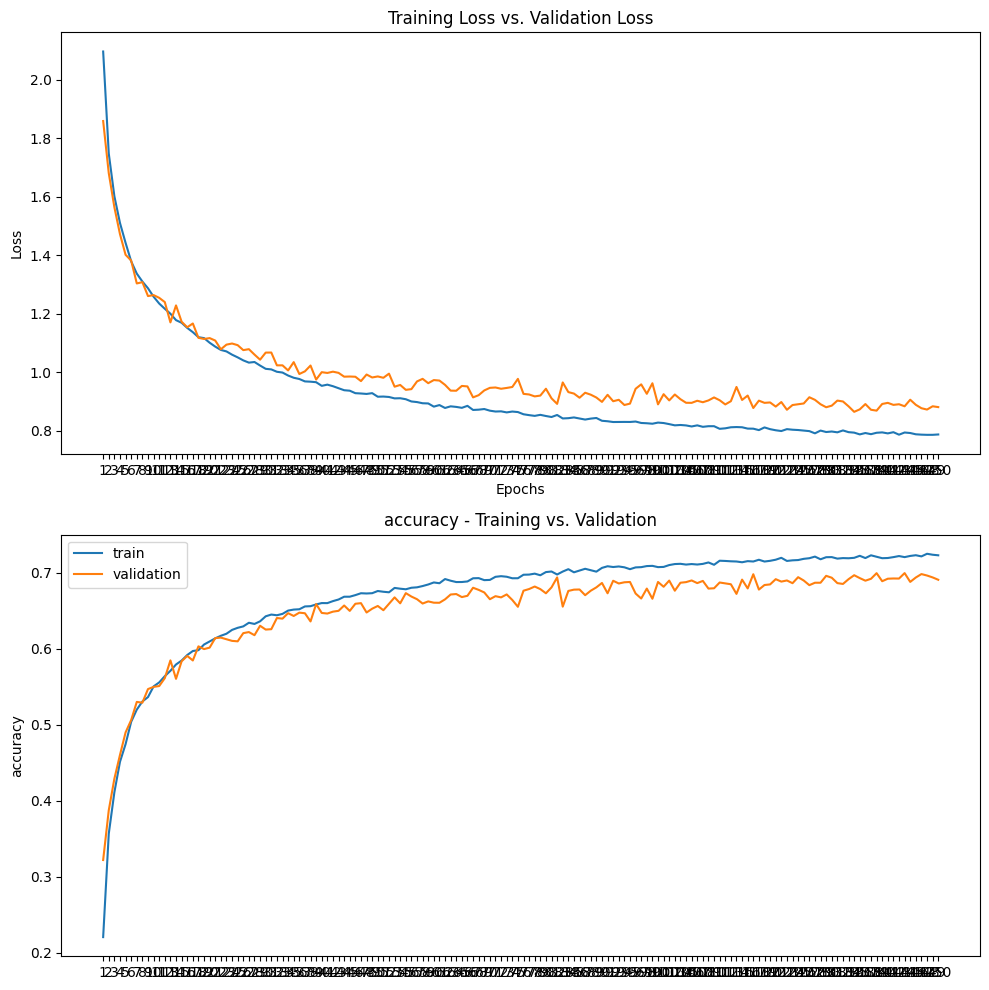

In [14]:
plot_history(trainer.history)

In [15]:
trainer.save_history_('model_output')

2023-01-26 19:18.25 [info     ] Saving the training history.
